In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv("../Downloads/titanic.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,...,C,702.0,"Butrus-Youssef, Master Makhkhul",4.0,"Sar'al[81], Syria",Cherbourg,"Detroit, Michigan, US",D,NaN,3.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [5]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [6]:
df.shape

(1309, 21)

In [7]:
df.Class.unique()

array([ 3.,  1.,  2., nan])

In [8]:
df.duplicated().sum()

0

In [9]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

# Single group single col./ count of passengers who survived from each class


In [54]:
pclass_survived=df.groupby(['Pclass'])['Survived']
data1

,Survived
Pclass,
1,136.0
2,87.0
3,119.0


# Multiple columns/ total amt paid by each class who survived

In [11]:
pclass_survived_fare=df.groupby(['Pclass'])['Survived','Fare']
pclass_survived_fare.sum()

,Survived,Fare
Pclass,,
1,136.0,28265.4043
2,87.0,5866.6374
3,119.0,9418.4452


# Multiple group / count of females/males who survived from each class.


In [12]:
pclass_survived_sex=df.groupby(['Pclass','Sex'])['Survived']
pclass_survived_sex.sum()

Pclass  Sex   
1       female    91.0
        male      45.0
2       female    70.0
        male      17.0
3       female    72.0
        male      47.0
Name: Survived, dtype: float64

# Multiple functions / mean & sum of pclass survived


In [13]:
pclass_survived_calc=df.groupby(['Pclass'])['Survived'].agg(['mean','sum'])
pclass_survived_calc

,mean,sum
Pclass,,
1,0.629630,136.0
2,0.472826,87.0
3,0.242363,119.0


In [14]:
df2=df.dropna(subset=['Survived'])

In [15]:
alive=df2.assign(alive_dead=df2['Survived']==1.0)
alive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,alive_dead
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0,False
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0,True
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0,False
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0,True


In [16]:
alive.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,alive_dead
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,False


In [17]:
pclass_survived_board=df.groupby(['Pclass'])['Boarded']
#pclass_survived_count=df.pclass_survived.value_counts()
pclass_survived_board.value_counts()

Pclass  Boarded    
1       Southampton    182
        Cherbourg      135
        Belfast          4
2       Southampton    241
        Cherbourg       24
        Belfast          6
        Queenstown       6
3       Southampton    493
        Queenstown     113
        Cherbourg      100
Name: Boarded, dtype: int64

In [18]:
pclass_survived_board=df.groupby(['Pclass'])['Boarded','Survived']
#pclass_survived_count=df.pclass_survived.value_counts()
pclass_survived_board.value_counts()

Pclass  Boarded      Survived
1       Southampton  1.0          75
        Cherbourg    1.0          61
        Southampton  0.0          52
        Cherbourg    0.0          24
        Belfast      0.0           3
2       Southampton  0.0          82
                     1.0          77
        Cherbourg    0.0           8
                     1.0           8
        Belfast      0.0           6
        Queenstown   1.0           2
                     0.0           1
3       Southampton  0.0         285
                     1.0          67
        Queenstown   0.0          46
        Cherbourg    0.0          41
        Queenstown   1.0          27
        Cherbourg    1.0          24
dtype: int64

In [19]:
pclass_survived_board=df.groupby(['Pclass','Survived'])['Boarded']
#pclass_survived_count=df.pclass_survived.value_counts()
pclass_survived_board.value_counts()

Pclass  Survived  Boarded    
1       0.0       Southampton     52
                  Cherbourg       24
                  Belfast          3
        1.0       Southampton     75
                  Cherbourg       61
2       0.0       Southampton     82
                  Cherbourg        8
                  Belfast          6
                  Queenstown       1
        1.0       Southampton     77
                  Cherbourg        8
                  Queenstown       2
3       0.0       Southampton    285
                  Queenstown      46
                  Cherbourg       41
        1.0       Southampton     67
                  Queenstown      27
                  Cherbourg       24
Name: Boarded, dtype: int64

In [20]:
alive['alive_dead'] = alive['alive_dead'].replace([True],"alive")
alive['alive_dead'] = alive['alive_dead'].replace([False],"dead")
alive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,alive_dead
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,dead
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,alive
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,alive
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,alive
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0,dead
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0,alive
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0,dead
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0,alive


In [21]:
df1=alive.query('Boarded=="Southampton" & Pclass==1')
pclass_survived_board=df1.groupby(['Pclass'])['Boarded','alive_dead']

pclass_survived_board.value_counts()

Pclass  Boarded      alive_dead
1       Southampton  alive         75
                     dead          52
dtype: int64

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


In [23]:
alive[(alive['Name'].str.contains("Braund"))]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,alive_dead
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,dead
477,478,0.0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,...,690.0,"Braund, Mr. Lewis Richard",29.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,dead


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# univariate analysis

# KDE PLOT

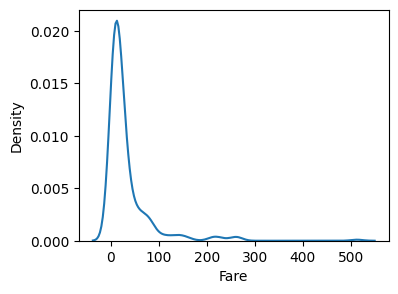

In [33]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=df.Fare)
plt.show()

# HIST PLOT

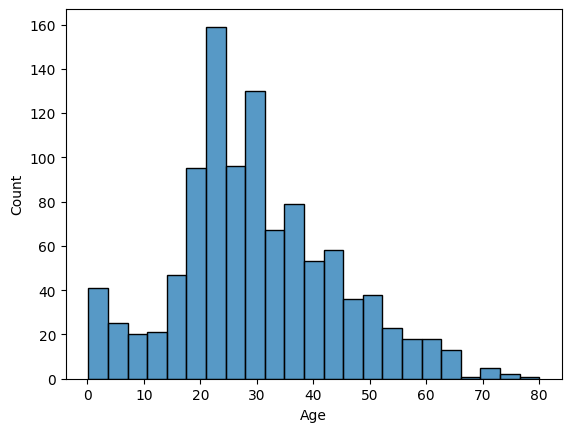

In [40]:
sns.histplot(df.Age)
plt.show()

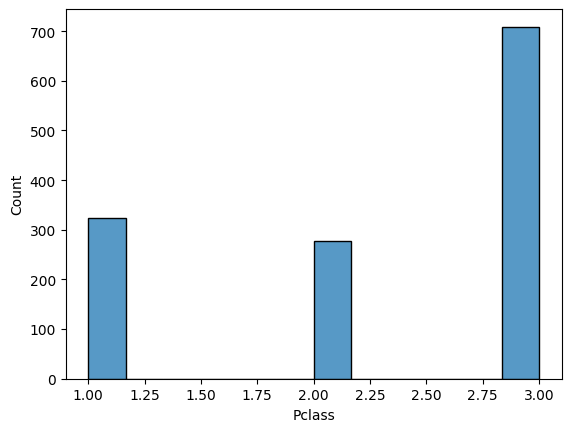

In [41]:
sns.histplot(df.Pclass)
plt.show()

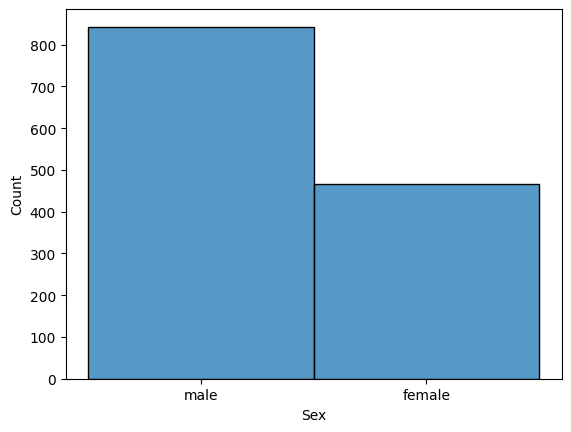

In [42]:
sns.histplot(df.Sex)
plt.show()

# multivariate analysis

# LINE PLOT

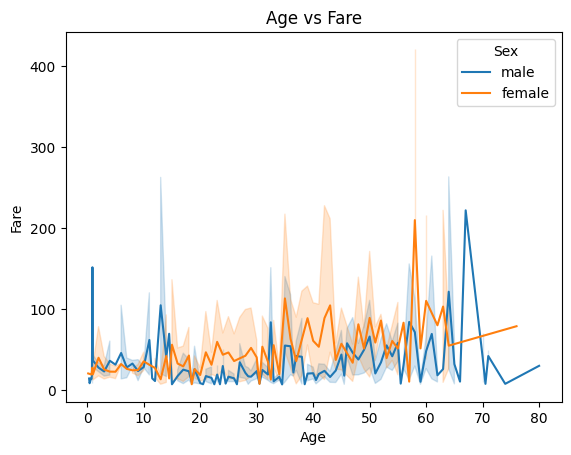

In [44]:
sns.lineplot('Age', 'Fare', data=df, hue="Sex")
plt.title("Age vs Fare")
plt.show()

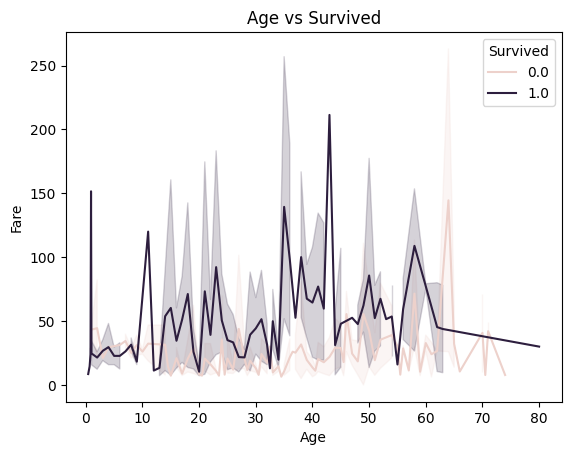

In [48]:
sns.lineplot('Age', 'Fare', data=df, hue="Survived")
plt.title("Age vs Survived")
plt.show()

# PIE CHART

In [57]:
data_pie = df.groupby(['Pclass'])['Survived'].sum()

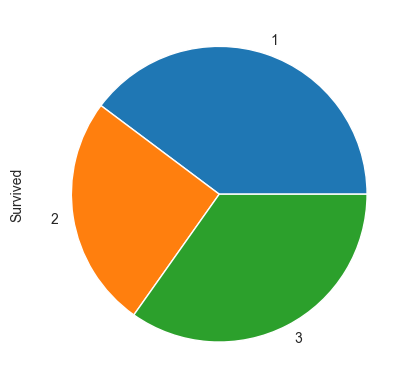

In [58]:
data_pie.plot.pie()
plt.show()

In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [60]:
data_pie1 = df.groupby(['Embarked'])['Survived'].sum()

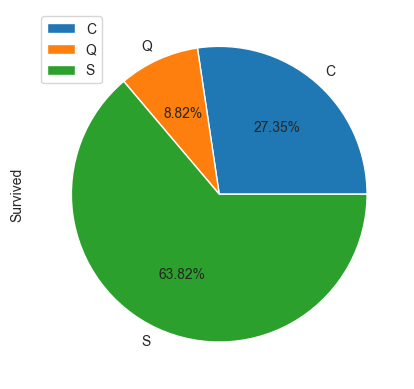

In [64]:
data_pie1.plot.pie(autopct = '%1.2f%%')
plt.legend()
plt.show()

In [65]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


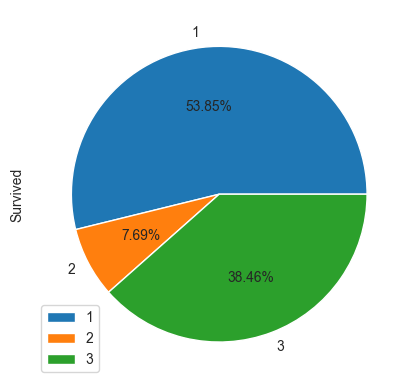

In [69]:
df_cher=df.query('Boarded=="Cherbourg" & Sex=="male"')

data_pie2 = df_cher.groupby(['Pclass'])['Survived'].sum()
data_pie2.plot.pie(autopct = '%1.2f%%')
plt.legend()
plt.show()